In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [3]:
import Phan_Tich as pt
%load_ext autoreload
%autoreload 2
ticker=['hpg.csv','vcb.csv','mbb.csv']
port=pd.DataFrame()
for t in ticker:
    port[t]=pt.ReadData(t)['close']

In [4]:
port.columns=['HPG close','VCB close','MBB close']

In [5]:
port=port.dropna()
port.isnull().sum()
port.head()

,HPG close,VCB close,MBB close
date,,,
2011-11-01,1.7622,10.5152,3.4400
2011-11-02,1.6882,10.3943,3.2904
2011-11-03,1.6680,10.2734,3.2655
2011-11-04,1.6478,10.2331,3.2156
2011-11-07,1.5671,9.9511,3.0661


In [6]:
ret=port/port.iloc[0]-1
ret.columns=['HPG','VCB','MBB']
ret.head()

,HPG,VCB,MBB
date,,,
2011-11-01,0.000000,0.000000,0.000000
2011-11-02,-0.041993,-0.011498,-0.043488
2011-11-03,-0.053456,-0.022995,-0.050727
2011-11-04,-0.064919,-0.026828,-0.065233
2011-11-07,-0.110714,-0.053646,-0.108692


Text(0.5, 1.0, 'Gía cổ phiếu tăng lên so với ngày 2011-11-01 ')

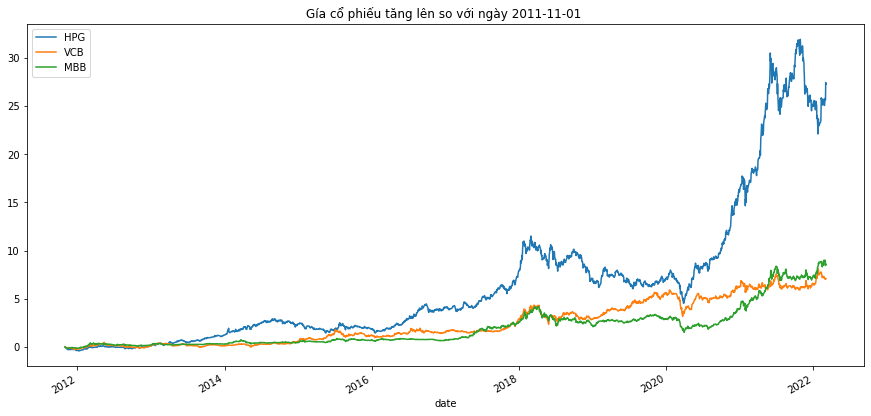

In [7]:
ret.plot(figsize=(15,7))
plt.title("Gía cổ phiếu tăng lên so với ngày 2011-11-01 ")

Text(0.5, 1.0, 'tăng giảm cổ phiếu so với ngày trước đó')

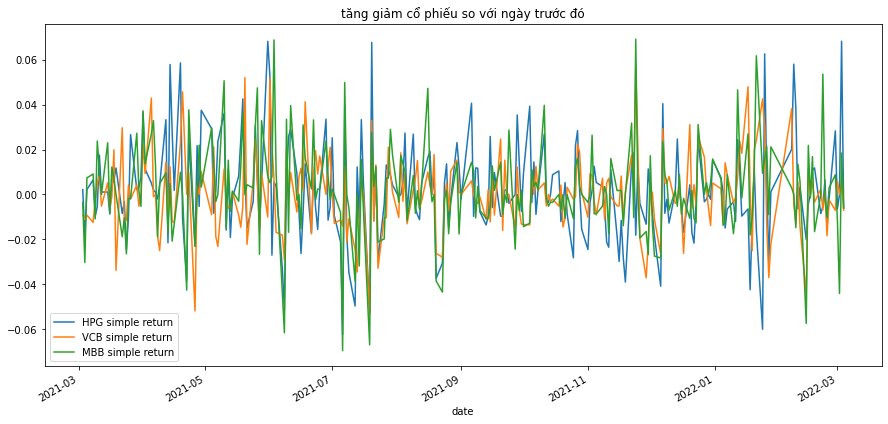

In [8]:
port1=pd.DataFrame()
port1['HPG simple return']=port['HPG close']/port['HPG close'].shift(1)-1
port1['VCB simple return']=port['VCB close']/port['VCB close'].shift(1)-1
port1['MBB simple return']=port['MBB close']/port['MBB close'].shift(1)-1
port1[['HPG simple return','VCB simple return','MBB simple return']].tail(252).plot(figsize=(15,7))
plt.title("tăng giảm cổ phiếu so với ngày trước đó")

In [9]:
ret=port/port.shift(1)-1
# ret=ret.drop('2014-09-22',axis=0)
ret.columns=['HPG simple return','VCB simple return','MBB simple return']
ret.head()

,HPG simple return,VCB simple return,MBB simple return
date,,,
2011-11-01,NaN,NaN,NaN
2011-11-02,-0.041993,-0.011498,-0.043488
2011-11-03,-0.011965,-0.011631,-0.007567
2011-11-04,-0.012110,-0.003923,-0.015281
2011-11-07,-0.048974,-0.027558,-0.046492


In [10]:
log_ret=np.log(port/port.shift(1))
# log_ret=log_ret.dropna()
log_ret.columns=['HPG log return','VCB log return','VCB log return']
log_ret.head()

,HPG log return,VCB log return,VCB log return
date,,,
2011-11-01,NaN,NaN,NaN
2011-11-02,-0.042900,-0.011564,-0.044462
2011-11-03,-0.012038,-0.011700,-0.007596
2011-11-04,-0.012184,-0.003930,-0.015399
2011-11-07,-0.050214,-0.027944,-0.047608


In [11]:
log_ret.mean()*252

HPG log return    0.326881
VCB log return    0.204325
VCB log return    0.220891
dtype: float64

In [12]:
ret.mean()*252

HPG simple return    0.383482
VCB simple return    0.251820
MBB simple return    0.259833
dtype: float64

In [13]:
# correlation(tuong quan)
# log_ret.cov()*252
# log_ret.corr()
ret.cov()

,HPG simple return,VCB simple return,MBB simple return
HPG simple return,0.000449,0.000192,0.000165
VCB simple return,0.000192,0.000377,0.000177
MBB simple return,0.000165,0.000177,0.000309


In [14]:
num_stock=len(ticker)
num_stock

3

In [15]:
w_array=np.random.random(num_stock)
w_array

array([0.60577783, 0.07652241, 0.32933463])

In [16]:
w_array[0]+w_array[1]+w_array[2]==1

False

In [17]:
weight=np.random.random(num_stock)
weight=weight/np.sum(weight)
weight[0]+weight[1]+weight[2]==1
weight

array([0.27590977, 0.12344464, 0.60064559])

In [18]:
weight=np.array([0.62847,0.0388,0.33273])

In [19]:
#expected port return(mức sinh lời dự kiến)
np.sum(weight *ret.mean())*252

0.3372319016470299

In [20]:
#expected port variance
port_var=np.dot(weight.T,np.dot(ret.cov()*252,weight))
port_var

0.07435276899010163

In [21]:
#expected port volatility(biến động dự kiến(độ lệch chuẩn?))
var=np.sqrt(port_var)
var

0.2726770415530094

In [22]:
#sử dụng thư viện có sẳn
m=expected_returns.mean_historical_return(port)
s=risk_models.sample_cov(port)

ef=EfficientFrontier(m,s)
w=ef.max_sharpe()
clean_w=ef.clean_weights()
print(clean_w)
ef.portfolio_performance(verbose=True)

OrderedDict([('HPG close', 0.62847), ('VCB close', 0.0388), ('MBB close', 0.33273)])
Expected annual return: 33.4%
Annual volatility: 27.3%
Sharpe Ratio: 1.15


(0.3340315358252236, 0.2726764248628838, 1.151663683368063)

In [26]:
port_ret=[]
w=[]
port_volatility=[]
var=[]
for i in range(10000):
    weight=np.random.random(num_stock)
    weight=weight/np.sum(weight)
    w.append(weight)
    port_ret.append(np.sum(weight *ret.mean())*252)
    port_volatility.append(np.sqrt(np.dot(weight.T,np.dot(ret.cov()*252,weight))))

port_ret=np.array(port_ret)
port_volatility=np.array(port_volatility)
w=np.array(w)
# port_volatility
# port_ret


In [28]:
#tao danh muc dau tu voi cac muc sinh loi va bien dong
Portfolio=pd.DataFrame({'% HPG':w[:,0],'% VCB':w[:,1],'% MBB':w[:,2],'return': port_ret, 'volatility':port_volatility})
Portfolio['Rate(Vola/Ret)']=(Portfolio['volatility']/Portfolio['return'])
Portfolio=Portfolio.sort_values('Rate(Vola/Ret)',ascending=True)
Portfolio


,% HPG,% VCB,% MBB,return,volatility,Rate(Vola/Ret)
7352,0.532324,0.126746,0.340930,0.324639,0.260988,0.803932
2261,0.534833,0.124314,0.340853,0.324969,0.261253,0.803934
1691,0.534572,0.125576,0.339853,0.324926,0.261220,0.803937
4011,0.534028,0.115710,0.350262,0.324938,0.261233,0.803946
6570,0.525051,0.130167,0.344782,0.323712,0.260248,0.803949
...,...,...,...,...,...,...
8976,0.025309,0.922376,0.052315,0.255572,0.296197,1.158958
3174,0.028591,0.933131,0.038278,0.255891,0.297887,1.164115
3786,0.025304,0.938877,0.035819,0.255439,0.298729,1.169473
9060,0.041789,0.957118,0.001093,0.257331,0.301909,1.173233


Text(0, 0.5, 'return')

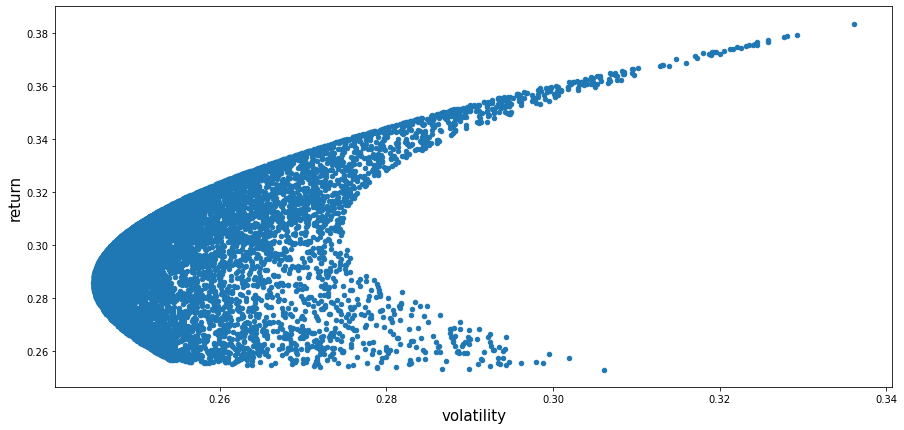

In [29]:
Portfolio.plot(x='volatility',y='return',kind='scatter',figsize=(15,7))
plt.xlabel('volatility',fontsize=15)
plt.ylabel('return',fontsize=15)